# Load Libraries

In [1]:


library(dplyr)
library(caret)
library(lattice)
library(ggplot2)
#library(qcc)
library(stats)
library(Hmisc)
library(car)
library(leaps)
library(outliers)
library(kknn)
library(knitr)
library(psych)
library(corrplot)
library(tidyverse)
library(cli)
library(devtools)
library(tree)
library(rpart)
library(pROC)
#library(pR2)
library(nnet)
library(foreign)
library(reshape2)
library(lattice)
library(ggplot2)
library(comprehenr)
library(gridExtra)
library(MASS)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: survival

Attaching package: ‘survival’

The following object is masked from ‘package:caret’:

    cluster

Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:dplyr’:

    src, summarize

The following objects are masked from ‘package:base’:

    format.pval, units

Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode


Attaching package: ‘kknn’

The following object is masked from ‘package:caret’:

    contr.dummy


Attaching packa

# Load Data

In [2]:
setwd("~/Downloads/Datasets/7406/Project")

white <- read.csv(file = "winequality_white.csv", head = TRUE, sep=";")
red <- read.csv(file = "winequality_red.csv", head = TRUE, sep=";")

In [3]:
#wine <- rbind(white, red)
wine <- red


# Exploratory Data Analysis

In [4]:
head(wine, 3)
str(wine)
summary(wine)

nobs <- nrow(wine)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5


'data.frame':	1599 obs. of  12 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...


 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

In [5]:
dim(white)

[1] 4898   12

In [6]:
dim(red)

[1] 1599   12

In [7]:
dim(wine)

[1] 1599   12

In [9]:
summary(wine)

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

In [10]:
na_count <- sapply(wine, function(y) sum(length(which(is.na(y)))))
na_count

fixed.acidity     volatile.acidity          citric.acid 
                   0                    0                    0 
      residual.sugar            chlorides  free.sulfur.dioxide 
                   0                    0                    0 
total.sulfur.dioxide              density                   pH 
                   0                    0                    0 
           sulphates              alcohol              quality 
                   0                    0                    0

Our dataset does not have any missing values. 

Our response variable "Quality" is a categorical one with the ranks from 1 to 10.
The range of values (min/max) across the variables does not require scaling or normalization. All predictors are numerical.


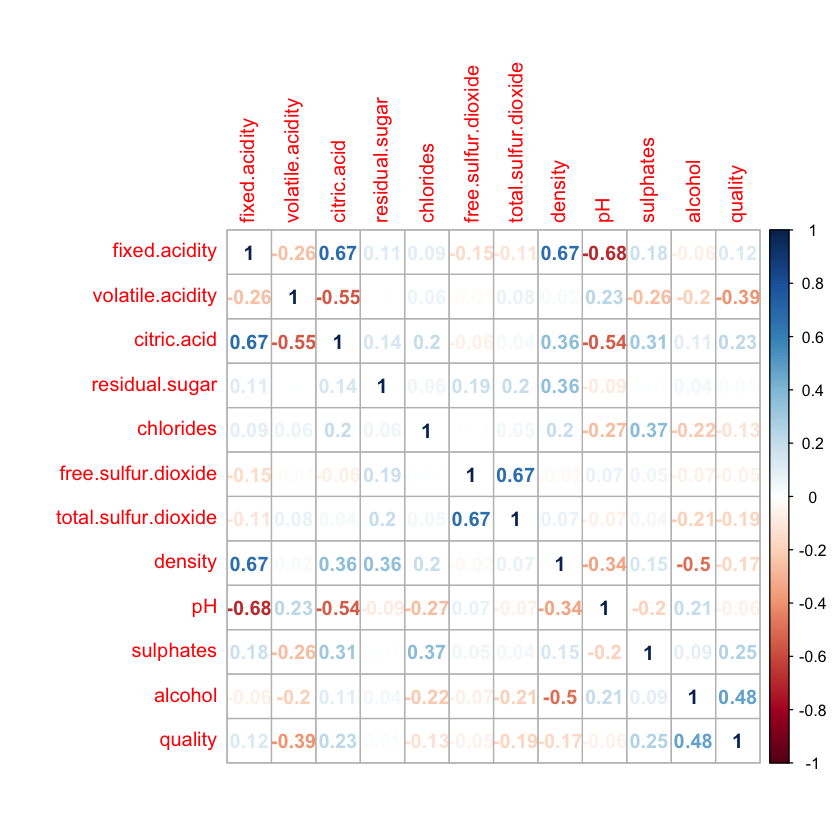

In [11]:
corrplot(cor(wine[1:(length(wine))]), method="number")

Covariance Matrix

There is some significant multicollineraity between several variables:

density - alcohol
total.sulfur.dioxide - free.sulfur.dioxide
density - residual.sugar
residual.sugar - total.sulfur.dioxide
density - fixed.acidity

Certain predictors will have to be removed. Most likely candidates are:

free.sulfur.dioxide
residual.sugar
fixed.acidity
alcohol


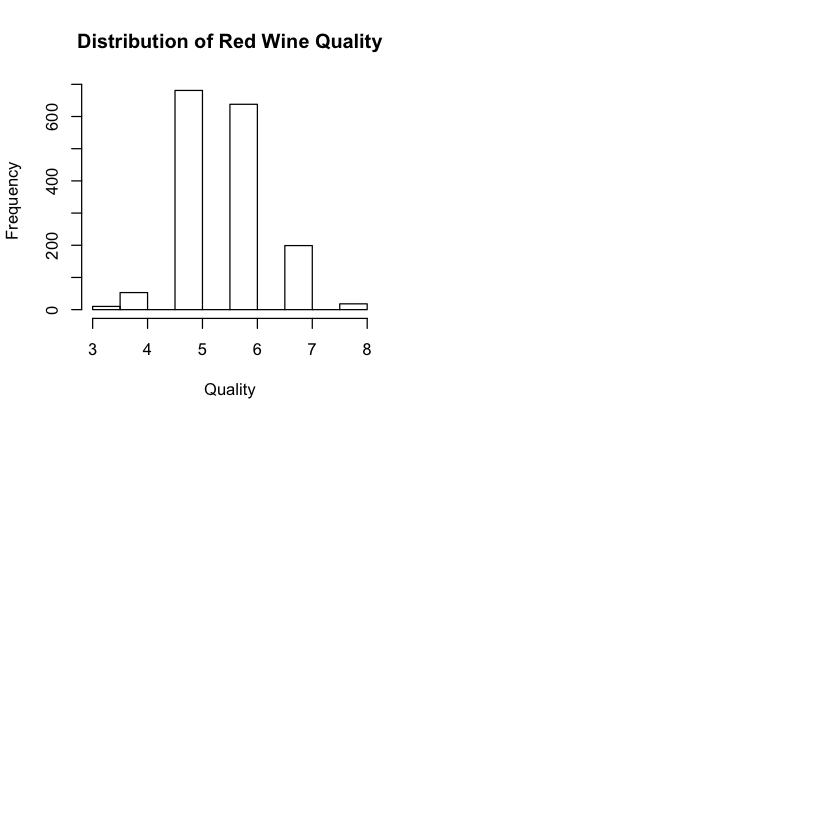

In [12]:
par(mfrow = c(2,2))

hist(wine$quality,xlab = 'Quality', main = "Distribution of Red Wine Quality")
#hist(wine[wine$type == "white",]$quality,xlab = 'Quality', main = "Distribution of White Wine Quality")
#hist(wine[wine$type == "red",]$quality,xlab = 'Quality', main = "Distribution of Red Wine Quality")

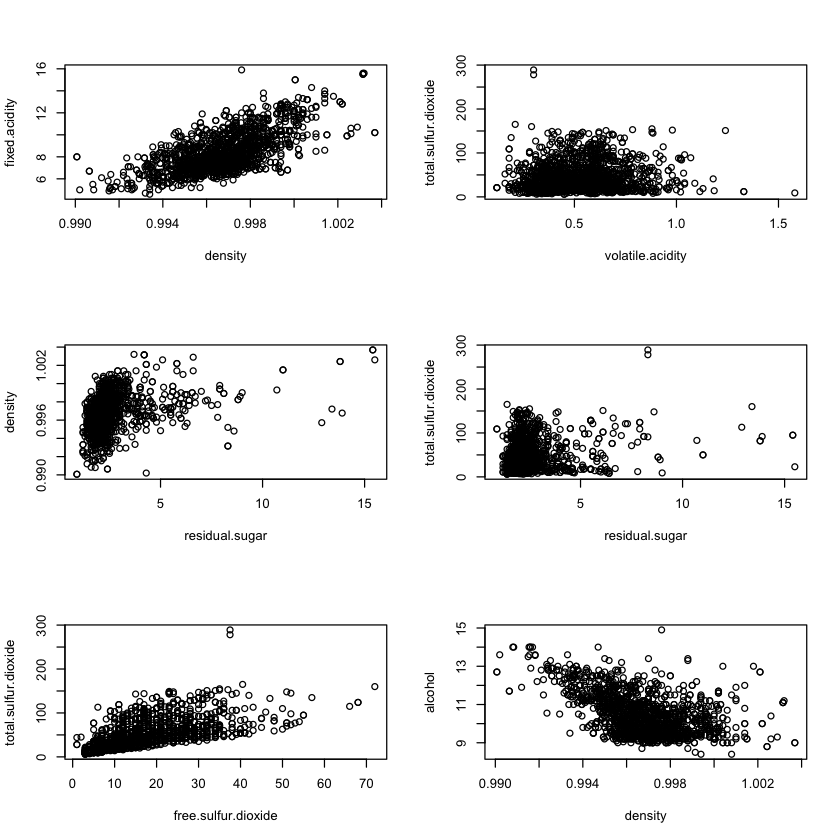

In [13]:
attach(wine)
par(mfrow = c(3,2))

plot(density, fixed.acidity)
plot(volatile.acidity, total.sulfur.dioxide)
plot(residual.sugar, density)
plot(residual.sugar, total.sulfur.dioxide)
plot(free.sulfur.dioxide, total.sulfur.dioxide)
plot(density, alcohol)

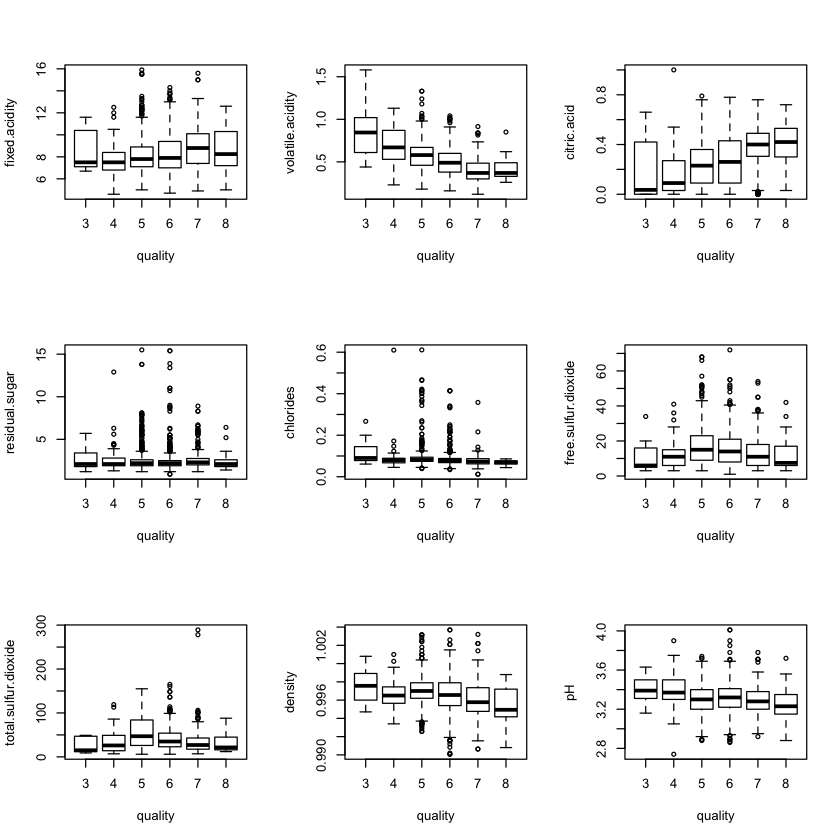

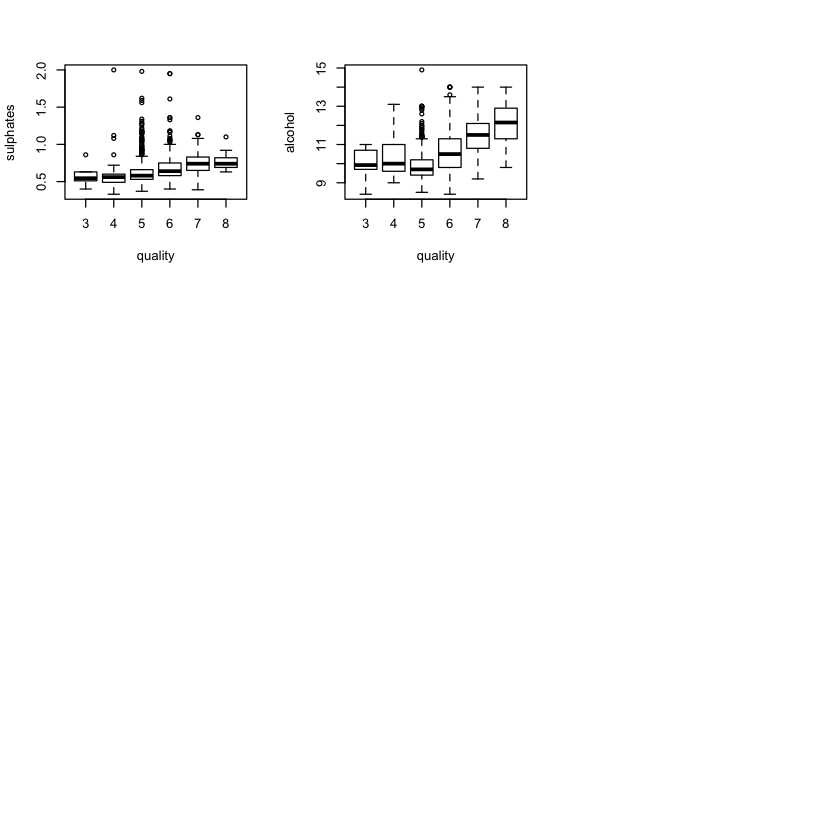

In [14]:
par(mfrow = c(3,3))
boxplot(fixed.acidity ~ quality)
boxplot(volatile.acidity ~ quality)
boxplot(citric.acid ~ quality)
boxplot(residual.sugar ~ quality)
boxplot(chlorides ~ quality)
boxplot(free.sulfur.dioxide ~ quality)
boxplot(total.sulfur.dioxide ~ quality)
boxplot(density ~ quality)
boxplot(pH ~ quality)
boxplot(sulphates ~ quality)
boxplot(alcohol ~ quality)

MODELING

We will start with converting scale values for "quality" from 1-10 to a binary system (0,1).
We will analyze initial dataset using ordinal logistic regression at the end of this research.

At first, we will use logistic regression, KNN, SVM, Trees etc..

For Logistic regression, we romoved the following non-significant predictors:

density
fixed.acidity
residual.sugar

This is well-aligned with the conclusions from the covariance matrix


In [15]:
wine.pr <- wine[1:11]

wine <- read.csv(file = "winequality_red.csv", head = TRUE, sep=";")
wine$quality <- ifelse(wine$quality>= 6, 1,0)
wine$quality <- as.factor(wine$quality)

summary(wine)

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

In [16]:
# Logistics Regression

print('ALL PREDICTORS')
lgall <- glm(quality ~ ., data = wine, family = binomial(link="logit"))
summary(lgall)

print('SIGNIFICANT PREDICTORS')
lgsig <- glm(quality ~ .- residual.sugar - fixed.acidity, data = wine, family = binomial(link="logit"))
summary(lgsig)
#plot(lgsig)

print('Significance Ranking')
round(vif(lgall),3)



[1] "ALL PREDICTORS"



Call:
glm(formula = quality ~ ., family = binomial(link = "logit"), 
    data = wine)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4025  -0.8387   0.3105   0.8300   2.3142  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           42.949948  79.473979   0.540  0.58890    
fixed.acidity          0.135980   0.098483   1.381  0.16736    
volatile.acidity      -3.281694   0.488214  -6.722 1.79e-11 ***
citric.acid           -1.274347   0.562730  -2.265  0.02354 *  
residual.sugar         0.055326   0.053770   1.029  0.30351    
chlorides             -3.915713   1.569298  -2.495  0.01259 *  
free.sulfur.dioxide    0.022220   0.008236   2.698  0.00698 ** 
total.sulfur.dioxide  -0.016394   0.002882  -5.688 1.29e-08 ***
density              -50.932385  81.148745  -0.628  0.53024    
pH                    -0.380608   0.720203  -0.528  0.59717    
sulphates              2.795107   0.452184   6.181 6.36e-10 ***
alcohol         

[1] "SIGNIFICANT PREDICTORS"



Call:
glm(formula = quality ~ . - residual.sugar - fixed.acidity, family = binomial(link = "logit"), 
    data = wine)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2393  -0.8473   0.3208   0.8383   2.3577  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -51.913625  45.716779  -1.136  0.25615    
volatile.acidity      -3.257146   0.486636  -6.693 2.18e-11 ***
citric.acid           -1.029941   0.523414  -1.968  0.04910 *  
chlorides             -4.370416   1.512874  -2.889  0.00387 ** 
free.sulfur.dioxide    0.023868   0.008166   2.923  0.00347 ** 
total.sulfur.dioxide  -0.017088   0.002770  -6.169 6.88e-10 ***
density               47.107532  45.526253   1.035  0.30079    
pH                    -1.114869   0.487760  -2.286  0.02227 *  
sulphates              2.670811   0.442320   6.038 1.56e-09 ***
alcohol                0.952286   0.086081  11.063  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’

[1] "Significance Ranking"


fixed.acidity     volatile.acidity          citric.acid 
               7.969                1.777                3.280 
      residual.sugar            chlorides  free.sulfur.dioxide 
               1.721                1.576                2.015 
total.sulfur.dioxide              density                   pH 
               2.191                5.768                3.439 
           sulphates              alcohol 
               1.482                2.290

Split data for Test and training datasets


In [18]:
#Random sampling
set.seed(7406)

test <- 0.8

ff <- floor((1 - test)*nobs)

ind <- sample(nobs, ff, replace = FALSE)

# Training and Test datasets
wine_train <- wine[ind,]
wine_test <- wine[-ind,]


Run both regression models on training dataset and the compare predictions

In [19]:
# Training Dataset

print('TRAINING - ALL PREDICTORS')
lgall <- glm(quality ~ ., data = wine_train, family = binomial(link="logit"))
summary(lgall)

aiclgall <- round(AIC(lgall),1)
biclgall <- round(BIC(lgall),1)

print(paste('AIC = ', aiclgall, '     BIC = ', biclgall))

print('TRAINING - SIGNIFICANT PREDICTORS')
lgsig <- glm(quality ~ .- residual.sugar - fixed.acidity - citric.acid - density, data = wine_train, family = binomial(link="logit"))
summary(lgsig)

aiclgsig <- round(AIC(lgsig),1)
biclgsig <- round(BIC(lgsig),1)

print(paste('AIC = ', aiclgsig, '     BIC = ', biclgsig))



[1] "TRAINING - ALL PREDICTORS"



Call:
glm(formula = quality ~ ., family = binomial(link = "logit"), 
    data = wine_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5688  -0.7440   0.2602   0.7532   2.1449  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           3.423e+02  1.972e+02   1.736  0.08256 .  
fixed.acidity         5.042e-01  2.610e-01   1.932  0.05336 .  
volatile.acidity     -4.157e+00  1.286e+00  -3.232  0.00123 ** 
citric.acid          -3.005e+00  1.339e+00  -2.244  0.02481 *  
residual.sugar        1.980e-01  1.489e-01   1.330  0.18362    
chlorides            -8.611e+00  5.104e+00  -1.687  0.09157 .  
free.sulfur.dioxide  -1.291e-02  2.069e-02  -0.624  0.53273    
total.sulfur.dioxide -8.897e-03  6.186e-03  -1.438  0.15039    
density              -3.567e+02  2.023e+02  -1.763  0.07785 .  
pH                    7.527e-01  1.904e+00   0.395  0.69253    
sulphates             5.765e+00  1.514e+00   3.808  0.00014 ***
alcohol   

[1] "AIC =  321.8      BIC =  367"
[1] "TRAINING - SIGNIFICANT PREDICTORS"



Call:
glm(formula = quality ~ . - residual.sugar - fixed.acidity - 
    citric.acid - density, family = binomial(link = "logit"), 
    data = wine_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3921  -0.7676   0.2858   0.7970   2.1490  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -5.946915   3.843765  -1.547 0.121825    
volatile.acidity      -2.722667   0.972613  -2.799 0.005121 ** 
chlorides            -10.704796   4.960784  -2.158 0.030937 *  
free.sulfur.dioxide   -0.002345   0.019556  -0.120 0.904563    
total.sulfur.dioxide  -0.012677   0.005692  -2.227 0.025936 *  
pH                    -1.005875   1.087491  -0.925 0.354992    
sulphates              4.854905   1.353567   3.587 0.000335 ***
alcohol                0.923976   0.169746   5.443 5.23e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null devia

[1] "AIC =  322.7      BIC =  352.8"


In [20]:
# PREDICTIONS

# Testing Dataset

print('TESTING - ALL PREDICTORS')

lg_err_train <- mean((floor(predict(lgall,wine_train[,1:11], type = "response")+0.5)) != wine_train$quality)
lg_err_test <- mean((floor(predict(lgall,wine_test[,1:11], type = "response")+0.5)) != wine_test$quality)

print(paste('Log Train error = ', round(lg_err_train,3),'    Log Test Error = ', round(lg_err_test,3)))


print('TESTING - SIGNIFICANT PREDICTORS')

lg_err_trains <- mean((floor(predict(lgsig,wine_train[,1:11], type = "response")+0.5)) != wine_train$quality)
lg_err_tests <- mean((floor(predict(lgsig,wine_test[,1:11], type = "response")+0.5)) != wine_test$quality)

print(paste('Log Train error = ', round(lg_err_trains,3),'    Log Test Error = ', round(lg_err_tests,3)))



[1] "TESTING - ALL PREDICTORS"
[1] "Log Train error =  0.223     Log Test Error =  0.263"
[1] "TESTING - SIGNIFICANT PREDICTORS"
[1] "Log Train error =  0.235     Log Test Error =  0.265"


Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”

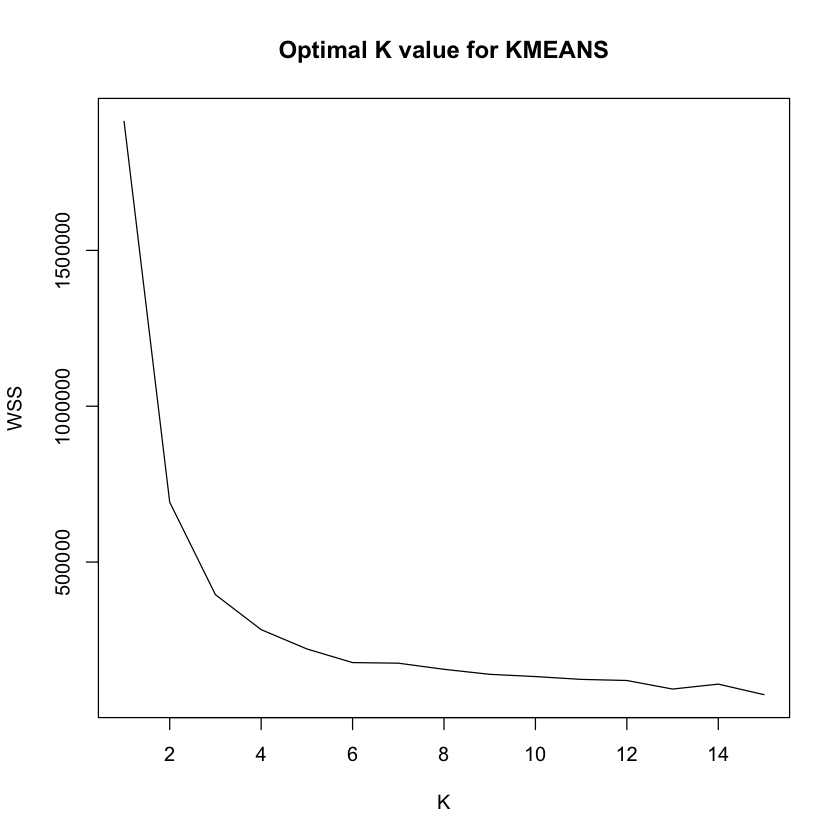

In [21]:
# KNN Method

library(ggplot2)

num <- 15
nst <- 6 #Initial number of centroids

res_fin <- matrix(0, num, 1) 

for (k in 1:num) {
  
    kmd <- kmeans(wine.pr, k, nstart = nst)
    kvl <- kmd$tot.withinss
    res_fin[k] <- kvl
}

plot(res_fin, type = 'l', ylab = 'WSS', xlab = 'K',
     main = 'Optimal K value for KMEANS')


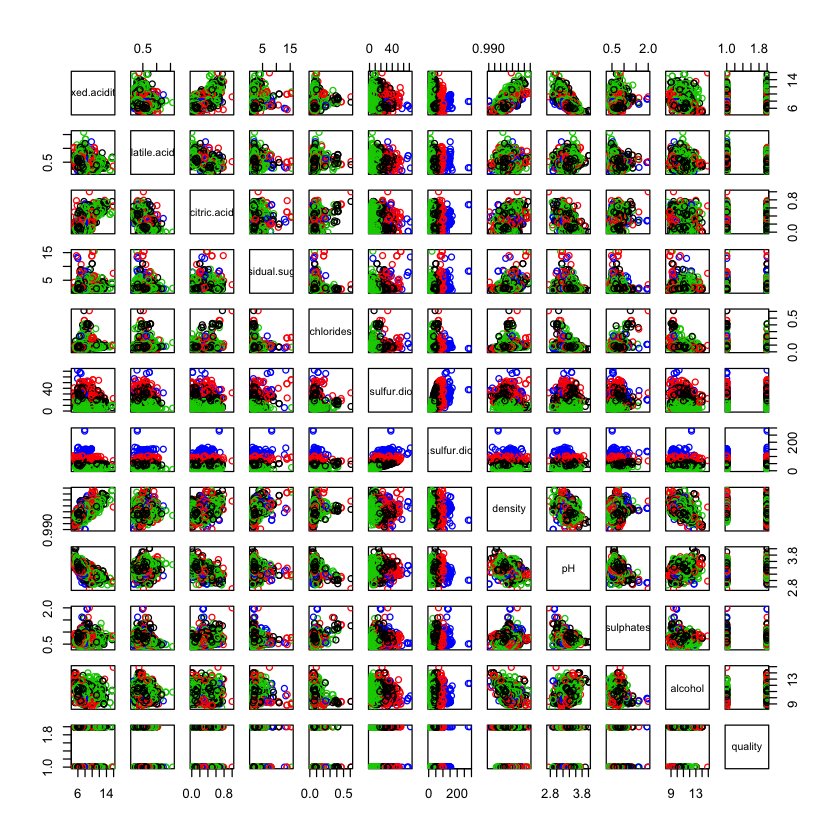

In [22]:
# WSS Method
set.seed(7406)

kbest <- 4 # The best K Value
fitK = kmeans(wine.pr, kbest, nstart = 5)
plot(wine,col = fitK$cluster)



In [23]:
# SVM
library(kknn)
library(caret)

kf <- 19 #k-fold 
K <- 50
test <- 0.20

ker <- "optimal"

#Random sampling
set.seed(7406)

ff <- floor((1 - test)*nobs)

ind <- sample(nobs, ff, replace = FALSE)

# Training and Test datasets
wine_train <- wine[ind,]
wine_test <- wine[-ind,]

wine_train$ind <- sample(rep_len(1:kf, nobs), ff, replace = FALSE) 

res_acc <- matrix(0, K, 1) #resulting accuracy

for(k in 1:K) {
  
  accuracy <- matrix(0,kf,1)
  
  for (i in 1:kf) {
    
        train = wine_train[wine_train$ind != i,]
        valid = wine_train[wine_train$ind == i,]
        
        # Model building
        wine_train.kknn  <- kknn(quality ~., train = train,
                             test = valid, k = k, distance = 1, 
                             kernel = ker, scale = TRUE)
        
        fit <- fitted(wine_train.kknn)
        
        valid$fit <- ifelse(fit > 0.5, 1, 0)
        
        result <- confusionMatrix(data = as.factor(valid$fit),
                                  reference = as.factor(valid$quality))
        
        accuracy[i] <- result$overall[1]
  }
  
  res_acc[k] <- mean(accuracy)
  
}
kbest <- which.max(res_acc)
racc <- max(res_acc)
print(paste("K value with Best Accuracy = ", kbest, " *** Best Accuracy = ", racc))


Warning message in Ops.factor(fit, 0.5):
“‘>’ not meaningful for factors”

ERROR: Error in confusionMatrix.default(data = as.factor(valid$fit), reference = as.factor(valid$quality)): The data must contain some levels that overlap the reference.


In [ ]:
# We need to reduce the number of classes in our response variable to acive a better accuracy

#wine$quality <- as.numeric(wine$quality)
#wine$quality[wine$quality=="1"] <- "Low Quality" 
#wine$quality[wine$quality=="2"] <- "Low Quality" 
#wine$quality[wine$quality=="3"] <- "Low Quality"
#wine$quality[wine$quality=="4"] <- "Low Quality" 
#wine$quality[wine$quality=="5"] <- "Medium Quality" 
#wine$quality[wine$quality=="6"] <- "Medium Quality" 
#wine$quality[wine$quality=="7"] <- "Medium Quality" 
#wine$quality[wine$quality=="8"] <- "High Quality" 
#wine$quality[wine$quality=="9"] <- "High Quality"
#wine$quality[wine$quality=="10"] <- "High Quality"

#wine$quality <- as.factor(wine$quality)

head(wine)
summary(wine)

# Modelling

### Ordinal Regression

In [ ]:
# Ordinal Regression

ord_mod <- polr(quality ~. - type, data = wine, Hess = TRUE)
summary(ord_mod)


In [ ]:
(ctable <- coef(summary(ord_mod)))

In [ ]:
## calculate and store p values
p <- pnorm(abs(ctable[, "t value"]), lower.tail = FALSE) * 2

## combined table
(ctable <- cbind(ctable, "p value" = p))

In [ ]:
(ci <- confint(ord_mod)) # default method gives profiled CIs

In [ ]:
confint.default(ord_mod) # CIs assuming normality

# If the move from 2.5% to 97.% includes a zero (a sign change) then this coefficient is NOT statistically significant

In [ ]:
## odds ratios - These coefficients are called proportional odds ratios
exp(cbind(OR = coef(ord_mod), ci))

In [ ]:
# Let's rerun the regression with only significant predictors

ord_mods <- polr(as.factor(quality) ~. -citric.acid - chlorides - total.sulfur.dioxide, data = wine, Hess = TRUE)
summary(ord_mods)


In [ ]:
(ctable1 <- coef(summary(ord_mods)))

In [ ]:
## calculate and store p values
p <- pnorm(abs(ctable1[, "t value"]), lower.tail = FALSE) * 2

## combined table
(ctable1 <- cbind(ctable1, "p value" = p))

In [ ]:
(ci1 <- confint(ord_mods)) # default method gives profiled CIs

In [ ]:
ci1 <- confint.default(ord_mods) # CIs assuming normality
ci1

# All predictors are significant

In [ ]:
## odds ratios - These coefficients are called proportional odds ratios
exp(cbind(OR = coef(ord_mods), ci1))

In [ ]:
# Proportional Odds

sf <- function(y) {
  c('Y>=0' = qlogis(mean(y >= 0)),
    'Y>=1' = qlogis(mean(y >= 1)),
    'Y>=2' = qlogis(mean(y >= 2)),
    'Y>=3' = qlogis(mean(y >= 3)),
    'Y>=4' = qlogis(mean(y >= 4)),
    'Y>=6' = qlogis(mean(y >= 6)),
    'Y>=7' = qlogis(mean(y >= 7)),
    'Y>=8' = qlogis(mean(y >= 8)),
    'Y>=9' = qlogis(mean(y >= 9)))
}

(s <- with(wine, summary(as.numeric(quality) ~ fixed.acidity + volatile.acidity + residual.sugar + 
                           free.sulfur.dioxide + density + pH + sulphates + alcohol, fun=sf)))

In [ ]:
# Example

glm(I(as.numeric(quality) >= 4) ~ density, family ="binomial", data = wine)

In [ ]:
#s[, 4] <- s[, 4] - s[, 3]
#s[, 3] <- s[, 3] - s[, 3]
#s

In [ ]:
glm(I(as.numeric(quality) >= 6) ~ density, family ="binomial", data = wine)

### Linear Regression

In [ ]:
# Linear Regression

set.seed(6501)

nobs <- nrow(wine)
spl <- 0.8

shuffle_index <- sample(1:nobs)
wine <- wine[shuffle_index, ]

train_indices = sample(1:nobs, nobs * spl)

train = wine[train_indices,] 
test = wine[-train_indices,]

mod1 = lm(quality ~. - chlorides - total.sulfur.dioxide ,data = train) 
summary(mod1)

kv <- 9
ad <- 2*kv*(kv+1)/(nrow(train)-kv-1)
aic_ad1 <- round(AIC(mod1) + ad,1)
bic1 <- round(BIC(mod1),1)

print(paste('AIC = ', aic_ad1, '   BIC = ', bic1))